In [1]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# COLLECTED DATA

# gain=2; non-inverting op amp
g2data = np.loadtxt('gain_2_data.csv', skiprows=1, delimiter=',')

g2freq = g2data[:,1]
g2mag = g2data[:,2]
g2phase = g2data[:,3]

# gain=10; non-inverting op amp
g10data = np.loadtxt('gain_10_data.csv', skiprows=1, delimiter=',')
g10freq = g10data[:,1]
g10mag = g10data[:,2]
g10phase = g10data[:,3]

# gain=10; inverting op amp
ig10data = np.loadtxt('gain_10_inverting_data.csv', skiprows=1, delimiter=',')
ig10freq = ig10data[:,1]
ig10mag = ig10data[:,2]
ig10phase = ig10data[:,3]

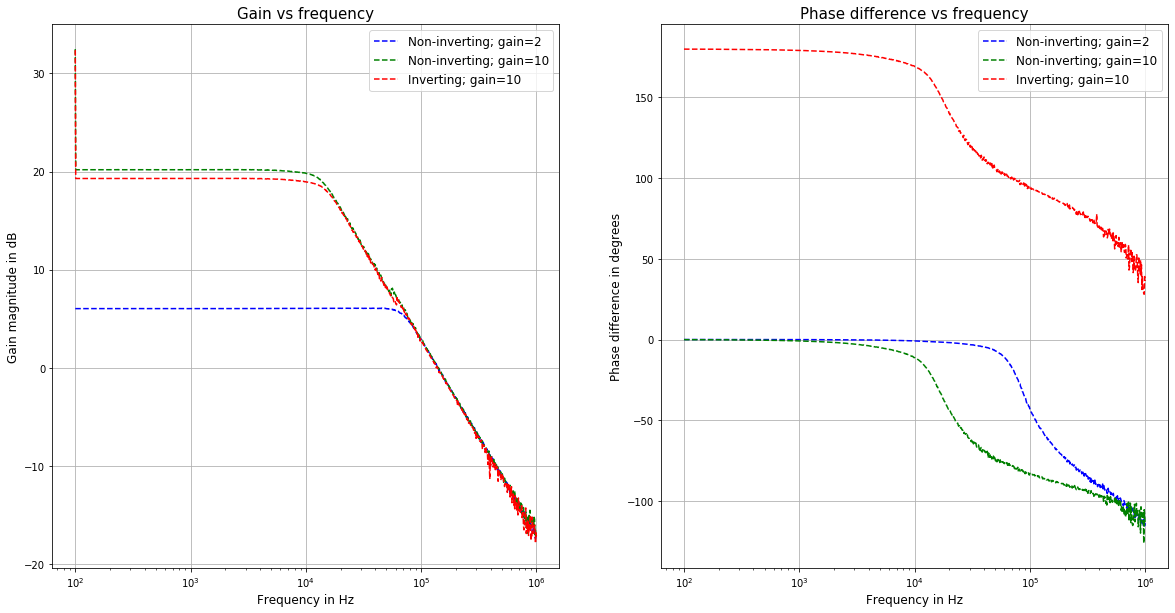

In [5]:
# GAIN AND PHASE VS FREQUENCY PLOTS

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Gain vs frequency', fontsize=15)
plt.ylabel('Gain magnitude in dB', fontsize=12)
plt.xlabel('Frequency in Hz', fontsize=12)
plt.semilogx(g2freq, g2mag, 'b--', label='Non-inverting; gain=2')
plt.semilogx(g10freq, g10mag, 'g--', label='Non-inverting; gain=10')
plt.semilogx(ig10freq, ig10mag, 'r--', label='Inverting; gain=10')
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.title('Phase difference vs frequency', fontsize=15)
plt.ylabel('Phase difference in degrees', fontsize=12)
plt.xlabel('Frequency in Hz', fontsize=12)
plt.semilogx(g2freq, g2phase, 'b--', label='Non-inverting; gain=2')
plt.semilogx(g10freq, g10phase, 'g--', label='Non-inverting; gain=10')
plt.semilogx(ig10freq, ig10phase, 'r--', label='Inverting; gain=10')
plt.legend(fontsize=12)
plt.grid()


In [6]:
# GAIN-BANDWIDTH PRODUCT CALCULATIONS

# figure out gain in flat portion and convert to ratio
print('GAIN IN FLAT PORTION')

g2length = int(np.size(g2mag)/2)
g2_flat = np.average(g2mag[0:g2length])
g2flat_ratio = 10**(g2_flat/20)
print('Non-inverting; gain=2 --> flat =', g2flat_ratio)

g10length = int(np.size(g10mag)/2)
g10_flat = np.average(g10mag[0:g10length])
g10flat_ratio = 10**(g10_flat/20)
print('Non-inverting; gain=10 --> flat =', g10flat_ratio)

ig10length = int(np.size(ig10mag)/2)
ig10_flat = np.average(ig10mag[0:ig10length])
ig10flat_ratio = 10**(ig10_flat/20)
print('Inverting; gain=10 --> flat =', ig10flat_ratio)
print('\n')

# find bandwidth
# bandwidth is the frequency at which the gain falls to 3db below the flat region
print('BANDWIDTH')

g2_threshold = g2_flat - 3
g2_bw_index = np.asarray(np.where(np.abs(g2mag - g2_threshold) < 0.095))
g2_bw = float(g2freq[g2_bw_index[[0]]])
print('Non-inverting; gain=2 --> bandwidth =', g2_bw, 'Hz')

g10_threshold = g10_flat - 3
g10_bw_index = np.asarray(np.where(np.abs(g10mag - g10_threshold) < 0.09))
g10_bw = float(g10freq[g10_bw_index[[0]]])
print('Non-inverting; gain=10 --> bandwidth =', g10_bw, 'Hz')

ig10_threshold = ig10_flat - 3
ig10_bw_index = np.asarray(np.where(np.abs(ig10mag - ig10_threshold) < 0.04))
ig10_bw = float(ig10freq[ig10_bw_index[[0]]])
print('Inverting; gain=10 --> bandwidth =', ig10_bw, 'Hz')
print('\n')

# calculate gain-bandwidth product
print('GAIN-BANDWIDTH PRODUCT')

g2_gbp = g2flat_ratio * g2_bw
print('Non-inverting; gain=2 --> gain-bandwidth product =', np.round(g2_gbp,2), 'Hz')

g10_gbp = g10flat_ratio * g10_bw
print('Non-inverting; gain=10 --> gain-bandwidth product =', np.round(g10_gbp,2), 'Hz')

ig10_gbp = ig10flat_ratio * ig10_bw
print('Inverting; gain=10 --> gain-bandwidth product =', np.round(ig10_gbp,2), 'Hz')
print('\n')

avg_gbp = (g2_gbp + g10_gbp + ig10_gbp)/3
print('AVERAGE GAIN-BANDWIDTH PRODUCT =', np.round(avg_gbp,2), 'Hz')

GAIN IN FLAT PORTION
Non-inverting; gain=2 --> flat = 2.0044698673275776
Non-inverting; gain=10 --> flat = 10.214068591780174
Inverting; gain=10 --> flat = 9.219885124942309


BANDWIDTH
Non-inverting; gain=2 --> bandwidth = 97947.0 Hz
Non-inverting; gain=10 --> bandwidth = 17957.8 Hz
Inverting; gain=10 --> bandwidth = 19511.5 Hz


GAIN-BANDWIDTH PRODUCT
Non-inverting; gain=2 --> gain-bandwidth product = 196331.81 Hz
Non-inverting; gain=10 --> gain-bandwidth product = 183422.2 Hz
Inverting; gain=10 --> gain-bandwidth product = 179893.79 Hz


AVERAGE GAIN-BANDWIDTH PRODUCT = 186549.27 Hz


In [8]:
# percent difference in gain-bandwidth product between non-inverting op amp circuits

percent_diff_noniverting = 100 * (np.abs(g2_gbp-g10_gbp)/g2_gbp)
percent_diff_noninverting2 = 100 * (np.abs(g2_gbp-g10_gbp)/g10_gbp)

print(np.round(percent_diff_noniverting,2),'percent difference from non-inverting gain=2')
print(np.round(percent_diff_noninverting2,2),'percent difference from non-inverting gain=10')

6.58 percent difference from non-inverting gain=2
7.04 percent difference from non-inverting gain=10


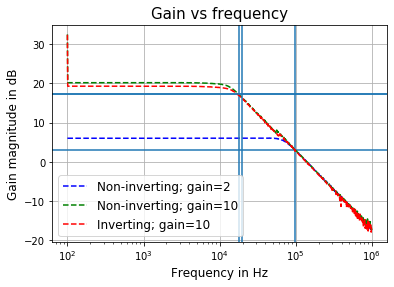

In [126]:
plt.title('Gain vs frequency', fontsize=15)
plt.ylabel('Gain magnitude in dB', fontsize=12)
plt.xlabel('Frequency in Hz', fontsize=12)

plt.semilogx(g2freq, g2mag, 'b--', label='Non-inverting; gain=2')
plt.axvline(g2_bw)
plt.axhline(g2_threshold)

plt.semilogx(g10freq, g10mag, 'g--', label='Non-inverting; gain=10')
plt.axvline(g10_bw)
plt.axhline(g10_threshold)

plt.semilogx(ig10freq, ig10mag, 'r--', label='Inverting; gain=10')
plt.axvline(ig10_bw)
plt.axhline(g10_threshold)

plt.legend(fontsize=12)
plt.grid()